<a href="https://colab.research.google.com/github/Chandradithya8/Machine-Learning/blob/master/Feature_Engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handling missing values
1.mean/median/mode replacement
2.Random sample replacement
3.Capturing Nan values with a new feature
4.End of distribution inputation
5.Arbitrary imputation
6.Frequent categories imputation



# **HANDLE NUMERICAL MISSING VALUES**

**1. mean/ median /mode replacement** - more frequently used

In [1]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv.txt',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [2]:
df.shape

(891, 3)

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age']=df.Age.fillna(df['Age'].median)
df.head(6)

,Survived,Age,Fare
0,0,22,7.2500
1,1,38,71.2833
2,1,26,7.9250
3,1,35,53.1000
4,0,35,8.0500
5,0,<bound method Series.median of 0 22.0\n1 ...,8.4583


Disadvantages- Distortion in variance

2. Random sample inputation(**Less** distortion in variance) - more frequently used

In [5]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv.txt',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [6]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [7]:
random_samples=df['Age'].dropna().sample(df['Age'].isnull().sum()) # Takes 177 random samples
random_samples

445     4.00
676    24.50
542    11.00
535     7.00
789    46.00
       ...  
755     0.67
713    29.00
823    27.00
745    70.00
604    35.00
Name: Age, Length: 177, dtype: float64

In [8]:
# should have the same index for merging
random_samples.index=df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age']=random_samples # replace df['Age'] with the random samples

In [9]:
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,4.0,8.4583


Disadvantage- Randomness wont work in every situation

**3.**  **Capturing NAN VALUES WITH A NEW FEATURE**


In [10]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv.txt',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [11]:
import numpy as np
df['Age_na']=np.where(df['Age'].isnull(),1,0)
df.head(6)

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1


Disadvantages- Creating additonal features(curse of dimentionality)

**4. End of distribution imputation**

In [19]:
import pandas as pd
%matplotlib inline
df=pd.read_csv('/content/titanic.csv.txt',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


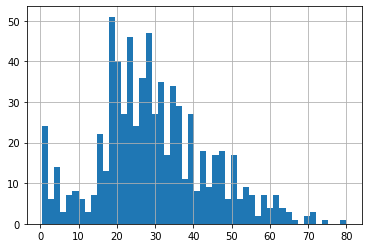

In [13]:
df.Age.hist(bins=50) # taking the end of the distribution and replacing it with the nan values(after the third standard distribution)

In [20]:
a=df.Age.mean()+3*(df.Age.std())
a

73.27860964406095

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


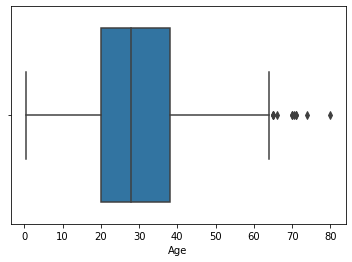

In [15]:
import seaborn as sns
sns.boxplot('Age',data=df) # finding the outliers

In [21]:
df['Age_na']=df.Age.fillna(a)
df.head(6)

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861


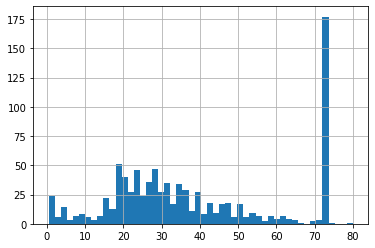

In [22]:
df.Age_na.hist(bins=50)

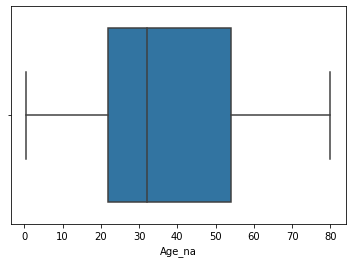

In [23]:
sns.boxplot('Age_na',data=df) # no outliers

5. Arbitrary imputation - Used on the basis of persons choice. No particular reason. We can the last of the distribution or least of the distribution ,based on the person's choice.

# HANDLE CATEGORICAL MISSING VALUES
1.FREQUENT CATEGORY IMPUTATION

In [27]:
import pandas as pd
%matplotlib inline
df=pd.read_csv('/content/train.csv.txt',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [29]:
df.isnull().sum() # BsmtQual and GarageType  has less no of missing values. So replace with most frequent values.

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [32]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [33]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [34]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [35]:
df.FireplaceQu.value_counts().index[0]

'Gd'

In [45]:
df['GarageType'].mode()[0]

'Attchd'

In [41]:
def inpute_nan(df,variable):
  most_frequent_value=df[variable].value_counts().index[0] # can also use mode
  df[variable].fillna(most_frequent_value,inplace=True)

In [42]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
  inpute_nan(df,i)

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


Disadvantages- Not suitable for columns having more Nan values 

2.Adding a variable to capture Nan (just used to display the importance of Nan)

In [46]:
import pandas as pd
%matplotlib inline
df=pd.read_csv('/content/train.csv.txt',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
df['nan']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


3.Suppose if we have more frequent categories we replace Nan with a new category(most common technique)

In [49]:
import pandas as pd
%matplotlib inline
df=pd.read_csv('/content/train.csv.txt',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
def inpute_nan(df,variable):
  df[variable+'_newvar']=np.where(df[variable].isnull(),'missing',df[variable])

In [55]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
  inpute_nan(df,i)

In [56]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
